In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
with open('lagrangian.json') as infile:
    d = json.load(infile) 

In [3]:
print(d[0].keys())

dict_keys(['dt', 'lon', 'lat', 'temp'])


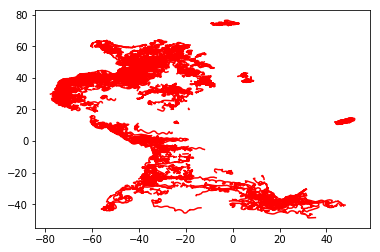

In [4]:
for i in range(len(d)):
    plt.plot(d[i]['lon'],d[i]['lat'],'r')

In [5]:
data_list = []
for i in range(len(d)):
    a = pd.DataFrame(d[i])
    a['time'] = a.index*a.dt
    a.replace([np.inf, -np.inf, float('Inf') , -float('Inf')], np.nan, inplace = True)
    a.dropna(inplace = True)
    if not a.empty:
        data_list.append(a)

In [6]:
min_lat = []
min_lon = []
max_lat = []
max_lon = []
for i in range(len(data_list)):
    min_lat.append(min(data_list[i].loc[:,'lat']))
    min_lon.append(min(data_list[i].loc[:,'lon']))
    max_lat.append(max(data_list[i].loc[:,'lat']))
    max_lon.append(max(data_list[i].loc[:,'lon']))
min_lat = min(min_lat)
min_lon = min(min_lon)
max_lat = max(max_lat)
max_lon = max(max_lon)

### Let's make a grid

In [7]:
b = pd.DataFrame()
for i in range(len(data_list)):
    b = b.append(data_list[i],ignore_index =True)

In [8]:
lat = np.linspace(min_lat,max_lat,20)
lon = np.linspace(min_lon,max_lon,10)
T_field = np.zeros((len(lat)-1,len(lon)-1))
pdf = np.zeros((len(lat)-1,len(lon)-1))

In [9]:
for i in range(len(lat)-1):
    for j in range(len(lon)-1):
        T_field[i,j] = b[ (b.lat >= lat[i]) & (b.lat< lat[i+1]) & (b.lon >= lon[j]) & (b.lon < lon[j+1])].temp.mean()
        pdf[i,j] = len(b[ (b.lat >= lat[i]) & (b.lat< lat[i+1]) & (b.lon >= lon[j]) & (b.lon < lon[j+1])]) / len(b)

In [10]:
#T_field[np.isnan(T_field)]=0

In [11]:
#print(T_field)

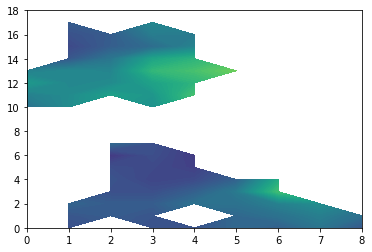

In [14]:
plt.figure()
plt.contourf(T_field,100)
plt.show()
plt.colorbar()

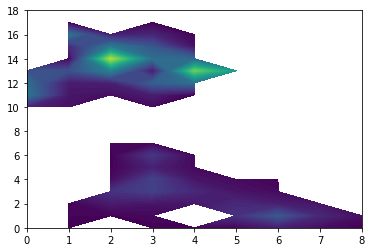

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [15]:
pdf[pdf==0] = np.nan
plt.figure()
plt.contourf(pdf,100)
plt.show()
plt.colorbar()